## Classification

### Using Multinomial Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
mnb = MultinomialNB()
mnb.fit(train_images, train_y)

MultinomialNB()

In [18]:
m_y_pred = mnb.predict(test_images)

In [19]:
print("Accuracy:", metrics.accuracy_score(test_y, m_y_pred))

Accuracy: 0.2566


### Using Gaussian Naive Bayes Classifiers

In [20]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_images, train_y)


GaussianNB()

In [21]:
y_pred = gnb.predict(test_images)

In [22]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3078


### Random Classifier

In [23]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
dmy_clf.fit(train_images, train_y)

DummyClassifier()

In [24]:
y_probas_dmy = dmy_clf.predict(test_images)

In [25]:
print("Accuracy:", metrics.accuracy_score(test_y, y_probas_dmy))

Accuracy: 0.1


The Gaussian Naive Bayes has about 30 percent and the Multinomial Naive Bayes has accuracy of 25.7 percent while a random classifier has about 10 percent accuracy. Both Gaussian and Multinomial Naive Bayes Classifiers perform quite poorly on the data set

### Kappa

## Evaluation Metrics

### Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, y_pred)

array([[264,   5,  18,  24,  86,  15,   9,   8,  62,   9],
       [133,  34,  61,  39, 134,  13,  29,  36,   7,  14],
       [ 24,   5, 261,  22,   8,  12,  21,  10,  47,  90],
       [ 66,  17,  59,  72, 145,  22,  35,  44,  26,  14],
       [ 85,   9,  30,  57, 229,  13,  21,  35,  13,   8],
       [ 94,  24,  48,  49, 121,  40,  58,  31,  17,  18],
       [ 67,  12,  46,  23, 100,  51, 142,  23,  15,  21],
       [ 50,  30,  57,  49, 130,  29,  34,  91,  12,  18],
       [ 71,   6,  53,  20,  22,   3,   4,  12, 266,  43],
       [ 41,   7, 129,  12,  20,  17,  24,  18,  92, 140]], dtype=int64)

Confusion matrix assuming the classifier was perfect

In [94]:
y_train_perfect_predictions = test_y  # pretend we reached perfection
confusion_matrix(test_y, y_train_perfect_predictions)

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 500,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 500,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 500,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 500,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 500,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 500,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 500,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 500,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 500]], dtype=int64)

From comparing both confusion matrices, only classes 1, 3 and 9 have above 50% precision. The rest all have below 50% precision

Confusion matrix for Random Classifier

In [165]:
# pretend we reached perfection
confusion_matrix(test_y, y_probas_dmy)

array([[500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [500,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

### Precision and Recall

Precision

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(test_y, y_pred, average='macro')

0.3001066275057857

Recall

In [27]:
recall_score(test_y, y_pred, average='micro')

0.3078

F1 Score

In [28]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average = 'macro')

0.28536229813124125

### Conclusion

Naive Bayes is not a very good classifier for this task

## Selecting K Best Features From Classes

Selecting The Best Two Features Per Class

In [29]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=pd.DataFrame(train_images)
x=pd.DataFrame(test_images)
#apply SelectKBest class to extract top 2 best features
bestfeatures2 = SelectKBest(score_func=chi2, k=20).fit(X,train_y)
dfscores = pd.DataFrame(bestfeatures2.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores2 = pd.concat([dfcolumns,dfscores],axis=1)
featureScores2.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores2.nlargest(10,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696


In [30]:
X_train_best_2 = bestfeatures2.transform(X)
X_test_best_2 = bestfeatures2.transform(x)
print(X_train_best_2, X_train_best_2.shape)


[[0.67058824 0.67843137 0.68235294 ... 0.69411765 0.56078431 0.54117647]
 [0.55686275 0.61960784 0.41568627 ... 0.50196078 0.61568627 0.62745098]
 [0.71372549 0.71372549 0.71372549 ... 0.71372549 0.6627451  0.65490196]
 ...
 [0.49411765 0.49803922 0.49803922 ... 0.38039216 0.49411765 0.48627451]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.50588235 0.52941176 0.5372549  ... 0.56862745 0.56078431 0.54509804]] (8000, 20)


### Using Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_best_2, train_y)
y_pred_2 = gnb.predict(X_test_best_2)

In [32]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_2))

Accuracy: 0.175


Precision and Recall

In [33]:
precision_score(test_y, y_pred_2, average='macro')

0.16393420388927157

Recall

In [34]:
recall_score(test_y, y_pred_2, average='micro')

0.175

F1 Score

In [35]:
f1_score(test_y, y_pred_2, average='micro')


0.175

Selecting the best 5 features per class

In [36]:
#apply SelectKBest class to extract top 5 best features
bestfeatures5 = SelectKBest(score_func=chi2, k=50).fit(X,train_y)
dfscores5 = pd.DataFrame(bestfeatures5.scores_)
dfcolumns5 = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores5 = pd.concat([dfcolumns5,dfscores5],axis=1)
featureScores5.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores5.nlargest(10,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696


In [37]:
X_train_best_5 = bestfeatures5.transform(X)
X_test_best_5 = bestfeatures5.transform(x)
print(X_train_best_5, X_train_best_5.shape)

[[0.63921569 0.6745098  0.69411765 ... 0.63137255 0.56078431 0.54117647]
 [0.44705882 0.50196078 0.51372549 ... 0.62352941 0.61568627 0.62745098]
 [0.70588235 0.70980392 0.71372549 ... 0.64705882 0.6627451  0.65490196]
 ...
 [0.49411765 0.30196078 0.15294118 ... 0.48235294 0.49411765 0.48627451]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.50588235 0.5254902  0.54117647 ... 0.55686275 0.56078431 0.54509804]] (8000, 50)


### Using Naive Bayes Classifier

In [38]:
gnb = GaussianNB()
gnb.fit(X_train_best_5, train_y)
y_pred_5 = gnb.predict(X_test_best_5)

In [39]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_5))

Accuracy: 0.1786


Precision and Recall

In [40]:
precision_score(test_y, y_pred_5, average='macro')

0.17092581068626062

Recall

In [41]:
recall_score(test_y, y_pred_5, average='micro')

0.1786

F1 Score

In [42]:
f1_score(test_y, y_pred_5, average='micro')

0.1786

Selecting The Best Ten Features

In [43]:
#apply SelectKBest class to extract top 10 best features
bestfeatures10 = SelectKBest(score_func=chi2, k=100).fit(X,train_y)
dfscores = pd.DataFrame(bestfeatures10.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

      Specs       Score
9122   9122  346.028062
9123   9123  344.975553
9121   9121  343.666246
9214   9214  341.153365
9139   9139  340.264556
9160   9160  340.188378
9120   9120  339.776143
9169   9169  339.616227
9213   9213  339.530146
9138   9138  339.481696
9162   9162  339.106586


In [44]:
X_train_best_10 = bestfeatures10.transform(X)
X_test_best_10 = bestfeatures10.transform(x)
print(X_train_best_10, X_train_best_10.shape)

[[0.70196078 0.63921569 0.59215686 ... 0.56078431 0.54117647 0.51372549]
 [0.70588235 0.44705882 0.43921569 ... 0.61568627 0.62745098 0.56078431]
 [0.70980392 0.70588235 0.70980392 ... 0.6627451  0.65490196 0.65490196]
 ...
 [0.50980392 0.49411765 0.4745098  ... 0.49411765 0.48627451 0.51764706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.51372549 0.50588235 0.50196078 ... 0.56078431 0.54509804 0.64313725]] (8000, 100)


In [45]:
gnb = GaussianNB()
gnb.fit(X_train_best_10, train_y)
y_pred_10 = gnb.predict(X_test_best_10)


In [46]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_10))

Accuracy: 0.178


Precision and Recall

In [47]:
precision_score(test_y, y_pred_10, average='micro')

0.178

Recall

In [48]:
recall_score(test_y, y_pred_10, average='micro')

0.178

In [49]:
f1_score(test_y, y_pred_10, average='micro')

0.178

# Clustering

## Introducing K-means
### Principal Component Analysis
Before applying k-means clustering, the data dimension is reduced using principle component analysis with the n_components set to 2 so that it can be visualized on a 2D graph.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trainX2D = pca.fit_transform(train_images)
print(trainX2D, trainX2D.shape)

The data was plotted in 2 dimensions in order to visualize it

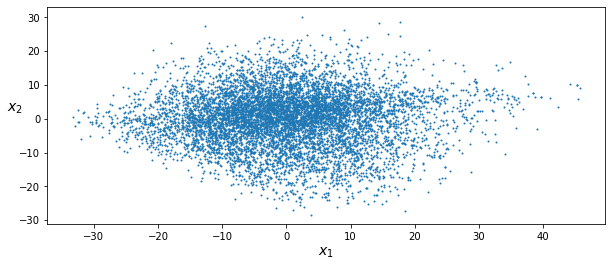

In [89]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(10, 4))
plot_clusters(trainX2D)
plt.show()

### Optimal Number of Clusters

To find the number of clusters, the elbow method was used. In the code below, the data was fitted into several models and the inertia for each clusterer plotted against the number of clusters. 

In [53]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(trainX2D)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [21]:
inertias

[1528962.915200128,
 920460.9942853844,
 680789.330637981,
 507617.85945282987,
 428425.4442485668,
 362124.3581138189,
 310842.654955374,
 276500.6268877866,
 246572.8653760112,
 224941.73927229625,
 205388.29610690844,
 188802.50821245025,
 176049.27460663303,
 161901.3741906133,
 151298.432248019,
 143331.2812653276,
 135329.18383385972,
 127505.4059994835,
 121470.35240008934]

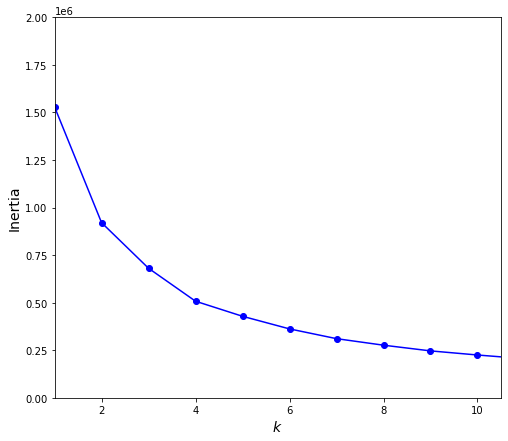

In [23]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 2000000])
plt.show()

For the sake of comparison, the same procedure as above was applied to the original data(with 9216 dimensions)

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(train_images)
                for k in range(1, 20)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[4651481.972466642,
 4042598.6062777704,
 3802037.84734913,
 3627464.994273644,
 3489077.219853462,
 3404724.019524816,
 3335596.296156053,
 3283843.191101059,
 3238531.5400846335,
 3201206.2145019025,
 3167456.1303968024,
 3138904.2122509982,
 3111860.544288165,
 3092811.9361409345,
 3066229.113450911,
 3047446.9901415636,
 3032964.756769674,
 3016854.4180584024,
 3002985.634006284]

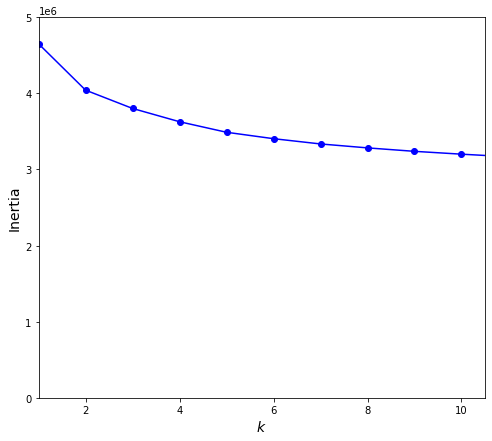

In [34]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 5000000])
plt.show()

The k-means algorithm was then applied to the data using k = 10

In [84]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans10 = kmeans.fit_predict(train_images)

Convert labels in train_y to 0-9

In [82]:
y_train = train_y-1

Compare labels with that of actual dataset

In [85]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_kmeans10))

Accuracy: 0.123125


In [72]:
confusion_matrix(train_y, y_pred_kmeans10)

array([[108,  38,  45,  16, 219, 123,  43, 120,  53,  35],
       [172,   0,  53,  58,  82, 155, 180,  36,  25,  39],
       [ 22,  61,  62, 151,   7,  44,  51,  21, 138, 243],
       [ 88,   1, 129, 113,  19, 172, 183,  24,  32,  39],
       [117,   0, 164,  67,  44, 138, 169,  37,  42,  22],
       [142,   1, 104,  78,  51, 150, 177,  23,  26,  48],
       [129,   3, 137,  93,  22,  85, 238,  21,  47,  25],
       [136,   0,  80,  98,  14, 135, 240,  22,  47,  28],
       [ 17, 213,  24,  23,  26,  71,  25, 207, 103,  91],
       [ 31, 154,  34,  79,  16,  33,  68,  77, 163, 145]], dtype=int64)

Use k means on test set

In [106]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans_test = kmeans.fit_predict(test_images)

Compare test set with predicted clusters

In [88]:
y_test = test_y-1
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_kmeans_test))

Accuracy: 0.066


Principal Component Analysis was applied to the test images in order to visualize it in 2D

In [74]:
pca2 = PCA(n_components=2)
testX2D = pca2.fit_transform(test_images)
print(testX2D, testX2D.shape)

[[ 1.69106706  1.79605286]
 [ 2.43145634  8.59533047]
 [-0.51624801  4.84360525]
 ...
 [ 2.63185828  2.97734612]
 [ 3.06007258 -1.72946074]
 [ 9.25338122 15.98897746]] (5000, 2)


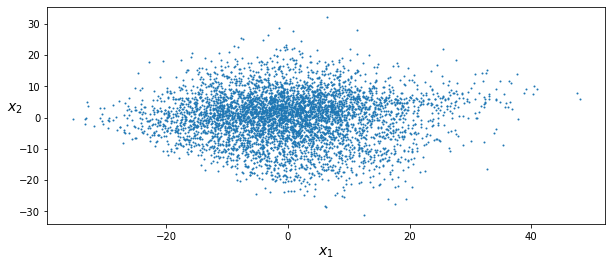

In [90]:
plt.figure(figsize=(10, 4))
plot_clusters(testX2D)
plt.show()

In [96]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans = kmeans.fit_predict(trainX2D)

In [97]:
X = trainX2D
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False) 

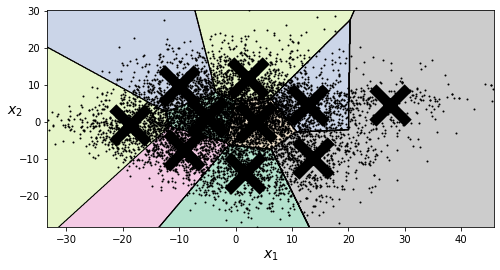

In [98]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

### Performance Evaluation

Precision

In [111]:
precision_score(y_test, y_pred_kmeans_test, average='micro')

0.066

Recall

In [112]:
recall_score(y_test, y_pred_kmeans_test, average='micro')

0.066

F1 Score

In [113]:
f1_score(y_test, y_pred_kmeans_test, average='micro')

0.066

### Making conclusions

The optimal number of clusters using the elbow method was the same for both 2 dimensional data and the original data. the elbow appeared to be at k=2. After reducing the dimensionality of the images and applying k-means of k=10 with 1, 2 and 3 iterations, the images appear to be normally distributed. There aren't clear distinctions between clusters.
From using inertia, the best model seem to be the one with k = 2. However, our data has 10 classes. The model with k=10 was now used to predict and compare performances with the actual data
In conclusion, because the data normally distributed and seems to have a single center for the entire data, k-means is not a good classifier.

## Beyond K-means: Applying GMM

Gaussian Mixture Model was applied to the data 

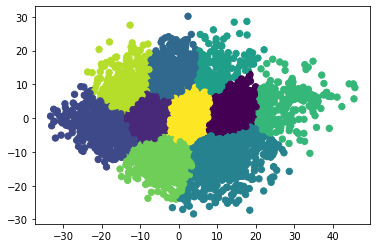

In [103]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 10).fit(trainX2D)
y_predict_gmm=gmm.predict(trainX2D)
plt.scatter(trainX2D[:, 0], trainX2D[:, 1], c=y_predict_gmm, s=40)

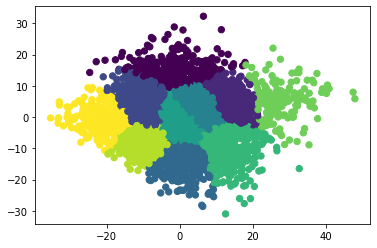

In [104]:
gmm2 = GMM(n_components = 10).fit(testX2D)
y_predict_gmm=gmm2.predict(testX2D)
plt.scatter(testX2D[:, 0], testX2D[:, 1], c=y_predict_gmm, s=40)

### Performance Evaluation

In [118]:
confusion_matrix(y_test, y_predict_gmm)

array([[ 28,  94,  30,  22,  85,  47,  92,  83,  13,   6],
       [ 18,  67,  96,   5, 111,  94,  27,  30,  15,  37],
       [ 17,   8,  79,  70,  15,  62,  20,   2, 138,  89],
       [ 42,  35, 116,  12,  97, 114,  19,   9,  20,  36],
       [ 59,  39,  92,   7, 125, 106,  13,  12,  17,  30],
       [ 57,  49, 107,  11,  98, 100,  18,  15,  20,  25],
       [ 63,  38, 114,   7,  90, 111,  15,   7,  26,  29],
       [ 25,  25, 102,   7, 114, 140,  20,   4,  37,  26],
       [  3,  22,  33, 109,  40,  84, 132,   6,  63,   8],
       [ 14,   5,  42, 119,  25,  91,  48,   6, 107,  43]], dtype=int64)

Precision

In [115]:
precision_score(y_test, y_predict_gmm, average='micro')

0.1072

Recall

In [116]:
recall_score(y_test, y_predict_gmm, average='micro')

0.1072

F1 Score

In [ ]:
f1_score(y_test, y_predict_gmm, average='micro')

### Making Conclusions

The GMM also performed worse than the Naive Bayes Classifiers. It is obvious that K-means and GMM are more suited to data with different center points but as observed above, this data is centered mainly around a single point.

# Supervised Learning: Generalisation and Overfitting; Decision Trees

In [37]:
inertias

[4651481.972466642,
 4042598.6062777704,
 3802037.84734913,
 3627464.9942736435,
 3489077.219853462,
 3404724.019524816,
 3335596.296156053,
 3283843.1911010584,
 3238531.5400846335]

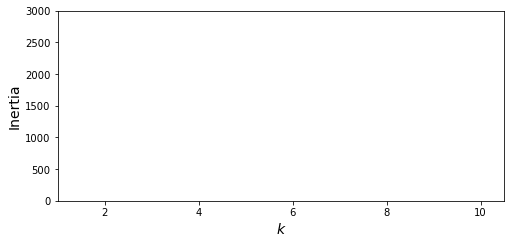

In [36]:
plt.figure(figsize=(8, 7))
plt.plot(range(1, 20), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 10.5, 0, 470000])
plt.show()

### Making Conclusions

### Making Conclusions

## Beyond K-Means: EM Algorithm

### Making Conclusions

# Neural Networks and Convolutional Neural Networks

# MSc Research Question

## Defining The Question